In [1]:
import pprint
import numpy as np
import pandas as pd
import sys
import re
import itertools
import copy
# sys.path.append("./recipes/recipes/lib/python3.8/site-packages")
import pymongo 
import glob
from pymongo import MongoClient
from pymongo.errors import ConnectionFailure

with open(glob.glob('/home/*/*/*/mymongo')[0]) as f:
    pass_key = f.read()
pass_key=pass_key.strip('\n')

In [2]:

# connect to the database as a user who has read-only privilege. 
user_name = 'ze_readOnly'
client = MongoClient()
try:
    client = MongoClient(username=user_name, password=pass_key)
    print('Server available, you are authenticated as user %s.'%(user_name))

except ConnectionFailure:
    print("Server not available")

Server available, you are authenticated as user ze_readOnly.


In [3]:
db = client.allrecipes
r = db.recipes

In [4]:
# for parsing the collection data
def append_value(dict_obj, key, value):
    [dict_obj[k].append(v) for k,v in zip(key,value)]
# if necessary, vectorize the function for speed 
append_value_v = np.vectorize(append_value)

In [5]:
# append all dicts of recipes from one Author
reciped = {'_id': [], 'title': [], 'Author': [], 'ingredient': [], 'direction': [], 
           'nutrition_per_serving': [], 'total_ratings': [], 
           'ratings': [], 'prep': [], 'cook': [], 'additional': [], 
           'total': [], 'Servings': [], 'Yield': []
          }

keys = list(reciped.keys())
for recipe in r.find(): #({"Author": 'MakeItHealthy'}):
    values = [recipe.get(k) for k in keys]
    append_value(reciped,keys,values)

In [6]:
# create a pandas data frame
allkeys = list(reciped.keys())
df = pd.DataFrame([reciped[k] for k in keys]).T
df.columns = allkeys
df.head()

,_id,title,Author,ingredient,direction,nutrition_per_serving,total_ratings,ratings,prep,cook,additional,total,Servings,Yield
0,611c22af28708657c245a2cb,Local Kine Wontons,Gina,"[1 quart oil for deep frying , 2 (8 ounce) pac...","[[Step 1, Heat oil in a large, heavy saucepan ...",[168 calories; protein 4.7g; carbohydrates 18g...,[95 Ratings],"{'5': 71, '4': 18, '3': 6, '2': 0, '1': 0}",30 mins,20 mins,None,50 mins,30,30 servings
1,611c22b128708657c245a2cc,VELVEETA® Potato Bites,VELVEETA Cheese,"[2 pounds baking potatoes, peeled, cut into ch...","[[Step 1, Cook potatoes in boiling water in la...",[67 calories; protein 2.6g; carbohydrates 11g;...,[3 Ratings],"{'5': 1, '4': 0, '3': 0, '2': 1, '1': 1}",20 mins,None,46 mins,1 hr 6 mins,24,24 servings
2,611c22b528708657c245a2cd,Vegan Homemade Plain Cream Cheese,Fioa,"[2 cups unsalted raw cashews , ½ teaspoon Hima...","[[Step 1, Soak cashews in a bowl of water, 8 h...",[48 calories; protein 1.5g; carbohydrates 2.7g...,[1 Ratings],"{'5': 1, '4': 0, '3': 0, '2': 0, '1': 0}",10 mins,None,9 hrs,9 hrs 10 mins,32,2 cups
3,611c22b928708657c245a2ce,Rhode Island-Style Pizza Strips aka Bakery Pizza,Rebecca C.,"[2 pounds prepared pizza dough , 1 (28 ounce) ...","[[Step 1, Preheat oven to 400 degrees F (200 d...",[275 calories; protein 7.9g; carbohydrates 33g...,[14 Ratings],"{'5': 10, '4': 1, '3': 1, '2': 1, '1': 1}",15 mins,15 mins,30 mins,1 hr,16,16 servings
4,611c22be28708657c245a2cf,Dad's Double Whole Grain Pancakes,Annie,"[1 cup all-purpose flour , 1 ⅓ cups dry milk p...","[[Step 1, In a large bowl, sift all-purpose fl...",[121 calories; protein 4.2g; carbohydrates 17....,[112 Ratings],"{'5': 87, '4': 16, '3': 8, '2': 1, '1': 0}",15 mins,20 mins,None,35 mins,28,28 pancakes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5128 entries, 0 to 5127
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   _id                    5128 non-null   object
 1   title                  5128 non-null   object
 2   Author                 5126 non-null   object
 3   ingredient             5128 non-null   object
 4   direction              5128 non-null   object
 5   nutrition_per_serving  5128 non-null   object
 6   total_ratings          5128 non-null   object
 7   ratings                5128 non-null   object
 8   prep                   4899 non-null   object
 9   cook                   2756 non-null   object
 10  additional             1527 non-null   object
 11  total                  4919 non-null   object
 12  Servings               5107 non-null   object
 13  Yield                  5107 non-null   object
dtypes: object(14)
memory usage: 561.0+ KB


In [8]:
# working on a copy is always safer with mutable data sturcutres  like pandas data frames
dff = copy.deepcopy(df)

In [9]:
# print out cooking directions for the first couple of them
for ttl, dr in zip(dff.loc[0:1,'title'], dff.loc[0:1,'direction']):
    direction = list(itertools.chain(*dr))
    ds = [d for d in direction  if d != None ]
    print('\x1b[1;31m'+ttl+'\x1b[0m')
    print("\n".join(ds[:-1]))

Local Kine Wontons
Step 1
Heat oil in a large, heavy saucepan to 375 degrees F (190 degrees C).
Step 2
In a medium bowl, mix the cream cheese, soy sauce, imitation crabmeat, water chestnuts and green onions.
Step 3
Place approximately 1 teaspoon of the cream cheese mixture in the center of each wonton wrapper. Fold into triangles and seal edges with moistened fingers.
Step 4
In small batches, fry the wontons in the hot oil 3 to 4 minutes, until golden brown. Drain on paper towels.
VELVEETA® Potato Bites
Step 1
Cook potatoes in boiling water in large saucepan 15 to 20 min. or until tender; drain. Cool 10 min. Mash potatoes until smooth. Add onions, egg and pepper; mix just until blended.
Step 2
Heat oven to 400 degrees F. Empty coating mix into pie plate. Roll potato mixture into 24 balls, using about 2 Tbsp. for each. Insert 1 VELVEETA cube into center of each ball, completely enclosing VELVEETA. Add, 1 at a time, to coating mix; turn to evenly coat. Place on rimmed baking sheet spraye

In [10]:
def fun_int(nut):
    # takes a list, nut
    # extracts the numeric parts of nut units
    # returns  nut values and units
    nut_names = [name for name in nut[::2]]
    values = []
    units = []
    for n in nut:
        try:
            value = '.'.join(re.findall(r'\d+',n))
            values.append(float(value))

            if isinstance (float(value), float):
                unit = n.strip(value)
                units.append(unit)
        except ValueError:
            pass
        
    return nut_names, values, units 

In [11]:
# As noted above some columns are made of lists. Need the  nutrition_per_serving in particular and going to flesh the data out from inside the lists

nut_list = list(itertools.chain(*dff['nutrition_per_serving'])) # gets a list out of data frame

# creating dictionaries 
Nut_names = []
Values = []
Units = []
ObjId = []
    
for nuts,objid in zip(nut_list,dff['_id']):

    nut = nuts.replace(';','')
    nut = nut.split(' ')
    nut[0], nut[1] = nut[1], nut[0]

    nut_names,values,units = fun_int(nut)
    Nut_names.append(nut_names)
    Values.append(values)
    Units.append(units)
    ObjId.append([str(objid)]*len(nut_names))


In [12]:
# creating a dataframe of just nutirents ( call it dnut)
# The gola is to create a multiindex data frame with food id as top level, and nutrient names under it.
# Obviously there are more nutiernts in each recipe than I scraped, but it is ok for now to work with what we have 
list(itertools.chain(*Nut_names))
list(itertools.chain(*Values))
list(itertools.chain(*Units))

arrays = [ np.array(list(itertools.chain(*ObjId))),
          np.array(list(itertools.chain(*Nut_names)))]
dnut = pd.DataFrame({
                     'nut_value':list(itertools.chain(*Values)), 
                     'nut_unit': list(itertools.chain(*Units)),
                    },index = arrays)
dnut = dnut.astype({'nut_value': 'float64'}).T
dnut

611c22af28708657c245a2cb                                         \
                          calories protein carbohydrates  fat cholesterol   
nut_value                    168.0     4.7          18.0  8.6        21.0   
nut_unit                                 g             g    g          mg   

                 611c22b128708657c245a2cc                             ...  \
          sodium                 calories protein carbohydrates  fat  ...   
nut_value  348.8                     67.0     2.6          11.0  1.5  ...   
nut_unit      mg                                g             g    g  ...   

          611c6b1b28708657c245b6a6                            \
                           protein carbohydrates  fat sodium   
nut_value                      1.5           5.2  3.9   56.8   
nut_unit                         g             g    g     mg   

          611c6b1d28708657c245b6a7                                          \
                          calories protein carbohydrates   fat cholesterol   
nut_value                    444.0    42.0          35.7  15.1        58.7   
nut_unit                                 g             g     g          mg   

                   
           sodium  
nut_value  1584.6  
nut_unit       mg  

[2 rows x 29327 columns]

In [158]:
# parameters collected from various sources including USDA, https://www.healthline.com/health/high-cholesterol/rda, and https://www.acefitness.org/education-and-resources/professional/expert-articles/5904/how-to-determine-the-best-macronutrient-ratio-for-your-goals/
CARB = np.array([.45, .65])  # calorie fraction from carbohydrate 
PRO = np.array([.1,.35])    # calorie fraction from protien
FAT = np.array([.2, .35])   # calorie fraction from fat
CHOL = np.array([5.5, 6.5]) # This corresponds to min and max of cholesterol ([11000/2000, 13000/2000])  mg/cal min and max of cholesterol 
SOD = np.array([1, 2])    # min and max of Sodium

# Pretend we are food experts... and rate food. Ignore food that does not have fat, protien,carbs and sodium for simpilfying task
def food_rater(dff):
    df = copy.deepcopy(dff)
    # if 'calories' in df.columns:
    #     tot_cal = df['calories'].values[0]
    #     print(tot_cal)
    # else:
    LIST1 = list(np.sort(['sodium', 'carbohydrates', 'protein', 'fat']))
    LIST2 = list(np.sort(list(set(['fat', 'protein', 'sodium', 'carbohydrates']).intersection(set(df.columns))))) 

    if LIST1 == LIST2:
                                                          
        if 'cholesterol' not in df:
            tot_cal = 4.0*df['carbohydrates'].get('nut_value') +4.0*df['protein'].get('nut_value') + 9.0*df['fat'].get('nut_value') 
            Xcarb = 4.0*df['carbohydrates'].get('nut_value')/tot_cal
            Xpro = 4.0*df['protein'].get('nut_value')/tot_cal
            Xfat = 9.0*df['fat'].get('nut_value')/tot_cal
            Xsod = df['sodium'].get('nut_value')/tot_cal
            Xchol = 'NA'
        else:
            tot_cal = 4.0*df['carbohydrates'].get('nut_value') +4.0*df['protein'].get('nut_value') + 9.0*df['fat'].get('nut_value') +0.009*df['cholesterol'].get('nut_value') 
                    # assuming unit is mg and cholestrol is still fat with 9 cal/gram cal source
            Xcarb = 4.0*df['carbohydrates'].get('nut_value')/tot_cal
            Xpro = 4.0*df['protein'].get('nut_value')/tot_cal
            Xfat = 9.0*df['fat'].get('nut_value')/tot_cal
            Xsod = df['sodium'].get('nut_value')/tot_cal
            Xchol = df['cholesterol'].get('nut_value')/tot_cal

            if Xchol <= CHOL[0]:
                df.loc['nut_value','cholesterol_level'] = 'low'
            elif Xchol >= CHOL[1]:
                df.loc['nut_value','cholesterol_level'] = 'high'
            else:
                df.loc['nut_value','cholesterol_level'] = 'normal'  
    else:
        tot_cal = np.nan 
        Xcarb = 'NA'
        Xpro = 'NA'
        Xfat = 'NA'
        Xsod = 'NA'
        Xchol = 'NA'

        
        
    if Xcarb != 'NA':  

        if Xcarb  <= CARB[0]:
            df.loc['nut_value','carbohydrates_level'] = 'low'
            df.loc['nut_value','carbohydrates_score'] = 1
        elif Xcarb >= CARB[1]:
            df.loc['nut_value','carbohydrates_level'] = 'high'
            df.loc['nut_value','carbohydrates_score'] = 0
        else:
            df.loc['nut_value','carbohydrates_level'] = 'normal' 
            df.loc['nut_value','carbohydrates_score'] = 2
    else:
            df.loc['nut_value','carbohydrates_level'] = np.nan 
            df.loc['nut_value','carbohydrates_score'] = np.nan
    
    if Xpro != 'NA':  

        if Xpro  <= PRO[0]:
            df.loc['nut_value','protien_level'] = 'low'
            df.loc['nut_value','protien_score'] = 1
        elif Xpro >= PRO[1]:
            df.loc['nut_value','protien_level'] = 'high'
            df.loc['nut_value','protien_score'] = 0
        else:
            df.loc['nut_value','protien_level'] = 'normal' 
            df.loc['nut_value','protien_score'] = 2
    else:
            df.loc['nut_value','protien_level'] = np.nan 
            df.loc['nut_value','protien_score'] = np.nan


    if Xfat != 'NA':    
        
        if Xfat  <= FAT[0]:
            df.loc['nut_value','fat_level'] = 'low'
            df.loc['nut_value','fat_score'] = 1
        elif Xfat >= FAT[1]:
            df.loc['nut_value','fat_level'] = 'high'
            df.loc['nut_value','fat_score'] = 0
        else:
            df.loc['nut_value','fat_level'] = 'normal'
            df.loc['nut_value','fat_score'] = 2
    else:
            df.loc['nut_value','fat_level'] = np.nan
            df.loc['nut_value','fat_score'] = np.nan
        
    if Xsod != 'NA':
        if Xsod <= 1: 
            df.loc['nut_value','sodium_level'] = 'good' 
            df.loc['nut_value','sodium_score'] = 2
        elif Xsod >= SOD[0] and Xsod <=SOD[1]:
            df.loc['nut_value','sodium_level'] = 'normal' 
            df.loc['nut_value','sodium_score'] = 1
        else:  
            df.loc['nut_value','sodium_level'] = 'bad' 
            df.loc['nut_value','sodium_score'] = 0
    else:
        df.loc['nut_value','sodium_level'] = np.nan 
        df.loc['nut_value','sodium_score'] = np.nan

    tot_score = df.fillna(0).loc['nut_value',['_score' in col for col in  df.columns]].sum()
    if tot_score in [0,2]:
        df['overall_food_quality'] = 'bad'
    elif tot_score in [3,4]:
        df['overall_food_quality'] = 'good'
    else:
        df['overall_food_quality'] = 'excellent'
    return df


In [73]:
k = 0
for ids in dff['_id'].values:
    try:
        x,y = dnut.get(str(ids)).shape
    except AttributeError:
        k = k+1
print(k)

43


In [81]:
# above results shows there are 43 recipes in the database that are empy (only ids). Will consider deleting them


In [166]:
# Now rate food based on nutrient composition. Note that the food id is appended to each food so we can trace back to it later on
# from functools import lru_cache
# @lru_cache(maxsize=32)
def rate_(dff):
    food=pd.DataFrame()
    for ids in dff['_id'].values:
        try:
            tot_cal = food_rater(dnut.get(str(ids)))
            tot_cal['food_id'] = ids
            food = food.append(tot_cal)
        except AttributeError:
            pass
    return food


In [167]:
food = rate_(dff)
food.loc['nut_value'].head()

,calories,protein,carbohydrates,fat,cholesterol,sodium,cholesterol_level,carbohydrates_level,carbohydrates_score,protien_level,protien_score,fat_level,fat_score,sodium_level,sodium_score,overall_food_quality,food_id
nut_value,168.0,4.7,18.0,8.6,21.0,348.8,low,low,1.0,normal,2.0,high,0.0,bad,0.0,good,611c22af28708657c245a2cb
nut_value,67.0,2.6,11.0,1.5,11.5,245.0,low,normal,2.0,normal,2.0,low,1.0,bad,0.0,excellent,611c22b128708657c245a2cc
nut_value,48.0,1.5,2.7,3.8,NaN,37.4,NaN,low,1.0,normal,2.0,high,0.0,good,2.0,excellent,611c22b528708657c245a2cd
nut_value,275.0,7.9,33.0,12.4,8.9,722.5,low,normal,2.0,normal,2.0,high,0.0,bad,0.0,good,611c22b928708657c245a2ce
nut_value,121.0,4.2,17.4,4.2,36.8,208.9,low,normal,2.0,normal,2.0,normal,2.0,normal,1.0,excellent,611c22be28708657c245a2cf


In [169]:
# try to calculate total labour cost assuming a minimium wage (give yourself a higher wage if you are a pro chief ... or whatever)
labour = copy.deepcopy(dff[["prep","cook","additional","total"]])
labour.head()

,prep,cook,additional,total
0,30 mins,20 mins,None,50 mins
1,20 mins,None,46 mins,1 hr 6 mins
2,10 mins,None,9 hrs,9 hrs 10 mins
3,15 mins,15 mins,30 mins,1 hr
4,15 mins,20 mins,None,35 mins


In [170]:
# as you can see above we need to clean up and homogenize the time units. We do that below and compute the total labour cost for each food recipe
def homo_time_units(x):
    if x is not None:
        x = x.replace('s','')
        x_list = x.split(' ')

        if 'hr' in x_list and 'min' in x_list:
                y =float(x_list[0]) + float(x_list[2])/60.0 # time in units of hr
        else:        
            if 'min' in x:
                y=float(x.replace('min',''))/60.0 # time in units of hr

            if  'hr' in x:
                y = float(x.replace('hr','')) 

            if  'day' in x:
                y = float(x.replace('day',''))*24 

                
        return  y 

labour['tot_hrs'] = labour['total'].apply(homo_time_units)
labour['tot_labour_cost($)']= labour['tot_hrs'].apply(lambda x: 10*x)
labour['_id'] = dff['_id']
labour.head()


,prep,cook,additional,total,tot_hrs,tot_labour_cost($),_id
0,30 mins,20 mins,None,50 mins,0.833333,8.333333,611c22af28708657c245a2cb
1,20 mins,None,46 mins,1 hr 6 mins,1.100000,11.000000,611c22b128708657c245a2cc
2,10 mins,None,9 hrs,9 hrs 10 mins,9.166667,91.666667,611c22b528708657c245a2cd
3,15 mins,15 mins,30 mins,1 hr,1.000000,10.000000,611c22b928708657c245a2ce
4,15 mins,20 mins,None,35 mins,0.583333,5.833333,611c22be28708657c245a2cf


In [171]:
# wish I could do something with the ingredients so that I can estimate the material cost of each recipe. That would be great. Main problem is getting/scraping prices of each ingredients. Tried walmart's page... but they didn't like it. Told to beat it. ( also read their robots.txt file) 
# Anyway, going to look into the data here a bit further...
# print out ingredients for the first couple of recipes
for ttl, ingredients_ in zip(dff.loc[0:1,'title'], dff.loc[0:1,'ingredient']):
    # ingredients_ = list(itertools.chain(*ing))
    ds = ['- ' + d  for d in ingredients_  if d != None ]
    print('\x1b[1;44m'+ 'Ingredients for ' + ttl+'\x1b[0m')
    print("\n".join(ds[:-1]))



Ingredients for Local Kine Wontons
- 1 quart oil for deep frying 
- 2 (8 ounce) packages cream cheese, softened 
- 2 tablespoons soy sauce 
- 1 (12 ounce) package imitation crabmeat, flaked 
- 1 (5 ounce) can water chestnuts, drained and chopped 
- 5 green onions, chopped 
Ingredients for VELVEETA® Potato Bites
- 2 pounds baking potatoes, peeled, cut into chunks 
- 2 green onions, thinly sliced 
- 1 egg, beaten 
- ¼ teaspoon black pepper 
- ¼ pound VELVEETA®, cut into 24 cubes 
- 1 (2.75 ounce) packet SHAKE 'N BAKE Extra Crispy Seasoned Coating Mix 


In [120]:
# Umm...the 20 unicodes at it again. No expert on html ( no expert on anything for that matter - just a dude with too many interestes than he can work on)
# I can do some silly coding to work around them as

stupid_dict={'¼':.250, 
 '½':.500, 
 '¾':.750,
 '⅐':.142,  
'⅑':.111,  
'⅒':.010, 
 '⅓':.333,  
 '⅔':.667, 
 '⅕':.200, 
 '⅖':.400,  
 '⅗':.600,  
 '⅘':.800,  
 '⅙':.167,  
 '⅚':833,  
 '⅛':.125, 
 '⅜':.375,  
 '⅝':.675,  
 '⅞':.875,  
 '⅟':1.00,  
 '↉':0.00} 

for ks in dff['ingredient'][0]:

    [print('\t{}\t{}'.format(s,ks)) for s in stupid_dict.keys() if s in  ks]

In [172]:
# how are we doin with memory management so far?
df.memory_usage(deep=True)

Index                        128
_id                       164096
title                     422629
Author                    346778
ingredient                658384
direction                 454040
nutrition_per_serving     408864
total_ratings             402688
ratings                  1148672
prep                      323219
cook                      235776
additional                184421
total                     330309
Servings                  304389
Yield                     349326
dtype: int64

In [173]:
df.select_dtypes(include = 'O').memory_usage(deep=True).sum()

5733719

In [23]:
# categorical dtypes have a lot less memory footprint than Obj dtypes. Could use something like below if ncassary  
# def to_category(df):
#     for f in df.select_dtypes(include = 'O').columns:
#         df[f] = df[f].astype('category',errors='ignore')
#     return df
# dcat = to_category(df)
# dcat.memory_usage(deep=True).sum()


In [196]:
# It's all about ratings, as someone would say. Let's see how each recipe does on a weighted average rating. Use the weight w = [5,4,3,2,1] corresponding to the number of stars and the order they are in the data
# calculate weighted means of star ratings of each recipe
def wtavg_star(r):
    w = np.array([5,4,3,2,1])
    if list(r.values()):
        avg_star = np.sum(list(r.values())*w)/15.0 #np.sum(w)
        return avg_star 
    else: 
        return np.nan
dff['weighted_mean_ratings'] = dff['ratings'].apply(wtavg_star)
dff.head()

,_id,title,Author,ingredient,direction,nutrition_per_serving,total_ratings,ratings,prep,cook,additional,total,Servings,Yield,weighted_mean_ratings
0,611c22af28708657c245a2cb,Local Kine Wontons,Gina,"[1 quart oil for deep frying , 2 (8 ounce) pac...","[[Step 1, Heat oil in a large, heavy saucepan ...",[168 calories; protein 4.7g; carbohydrates 18g...,[95 Ratings],"{'5': 71, '4': 18, '3': 6, '2': 0, '1': 0}",30 mins,20 mins,None,50 mins,30,30 servings,29.666667
1,611c22b128708657c245a2cc,VELVEETA® Potato Bites,VELVEETA Cheese,"[2 pounds baking potatoes, peeled, cut into ch...","[[Step 1, Cook potatoes in boiling water in la...",[67 calories; protein 2.6g; carbohydrates 11g;...,[3 Ratings],"{'5': 1, '4': 0, '3': 0, '2': 1, '1': 1}",20 mins,None,46 mins,1 hr 6 mins,24,24 servings,0.533333
2,611c22b528708657c245a2cd,Vegan Homemade Plain Cream Cheese,Fioa,"[2 cups unsalted raw cashews , ½ teaspoon Hima...","[[Step 1, Soak cashews in a bowl of water, 8 h...",[48 calories; protein 1.5g; carbohydrates 2.7g...,[1 Ratings],"{'5': 1, '4': 0, '3': 0, '2': 0, '1': 0}",10 mins,None,9 hrs,9 hrs 10 mins,32,2 cups,0.333333
3,611c22b928708657c245a2ce,Rhode Island-Style Pizza Strips aka Bakery Pizza,Rebecca C.,"[2 pounds prepared pizza dough , 1 (28 ounce) ...","[[Step 1, Preheat oven to 400 degrees F (200 d...",[275 calories; protein 7.9g; carbohydrates 33g...,[14 Ratings],"{'5': 10, '4': 1, '3': 1, '2': 1, '1': 1}",15 mins,15 mins,30 mins,1 hr,16,16 servings,4.000000
4,611c22be28708657c245a2cf,Dad's Double Whole Grain Pancakes,Annie,"[1 cup all-purpose flour , 1 ⅓ cups dry milk p...","[[Step 1, In a large bowl, sift all-purpose fl...",[121 calories; protein 4.2g; carbohydrates 17....,[112 Ratings],"{'5': 87, '4': 16, '3': 8, '2': 1, '1': 0}",15 mins,20 mins,None,35 mins,28,28 pancakes,35.000000


<br>Enough with the ratings, now merge all new data columns created</br>
  They are:
 1. "tot_labour_cost($)" from labour df
 2. all columns from food df. For merging to work smoothly, update the column name food_id to simply _id. Ignore nut_unit rows at this point

In [175]:
food.rename(columns={'food_id':'_id'},inplace=True)
food.head()

,calories,protein,carbohydrates,fat,cholesterol,sodium,cholesterol_level,carbohydrates_level,carbohydrates_score,protien_level,protien_score,fat_level,fat_score,sodium_level,sodium_score,overall_food_quality,_id
nut_value,168.0,4.7,18.0,8.6,21.0,348.8,low,low,1.0,normal,2.0,high,0.0,bad,0.0,good,611c22af28708657c245a2cb
nut_unit,,g,g,g,mg,mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good,611c22af28708657c245a2cb
nut_value,67.0,2.6,11.0,1.5,11.5,245.0,low,normal,2.0,normal,2.0,low,1.0,bad,0.0,excellent,611c22b128708657c245a2cc
nut_unit,,g,g,g,mg,mg.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,excellent,611c22b128708657c245a2cc
nut_value,48.0,1.5,2.7,3.8,NaN,37.4,NaN,low,1.0,normal,2.0,high,0.0,good,2.0,excellent,611c22b528708657c245a2cd


In [176]:
labour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5128 entries, 0 to 5127
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   prep                4899 non-null   object 
 1   cook                2756 non-null   object 
 2   additional          1527 non-null   object 
 3   total               4919 non-null   object 
 4   tot_hrs             4919 non-null   float64
 5   tot_labour_cost($)  4919 non-null   float64
 6   _id                 5128 non-null   object 
dtypes: float64(2), object(5)
memory usage: 280.6+ KB


In [177]:
food_quality = copy.deepcopy(food.loc['nut_value',:].reset_index().drop(columns=['index']))
food_quality.head()

,calories,protein,carbohydrates,fat,cholesterol,sodium,cholesterol_level,carbohydrates_level,carbohydrates_score,protien_level,protien_score,fat_level,fat_score,sodium_level,sodium_score,overall_food_quality,_id
0,168.0,4.7,18.0,8.6,21.0,348.8,low,low,1.0,normal,2.0,high,0.0,bad,0.0,good,611c22af28708657c245a2cb
1,67.0,2.6,11.0,1.5,11.5,245.0,low,normal,2.0,normal,2.0,low,1.0,bad,0.0,excellent,611c22b128708657c245a2cc
2,48.0,1.5,2.7,3.8,NaN,37.4,NaN,low,1.0,normal,2.0,high,0.0,good,2.0,excellent,611c22b528708657c245a2cd
3,275.0,7.9,33.0,12.4,8.9,722.5,low,normal,2.0,normal,2.0,high,0.0,bad,0.0,good,611c22b928708657c245a2ce
4,121.0,4.2,17.4,4.2,36.8,208.9,low,normal,2.0,normal,2.0,normal,2.0,normal,1.0,excellent,611c22be28708657c245a2cf


In [178]:
food_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5085 entries, 0 to 5084
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   calories              5085 non-null   object 
 1   protein               5079 non-null   object 
 2   carbohydrates         5084 non-null   object 
 3   fat                   5049 non-null   object 
 4   cholesterol           3946 non-null   object 
 5   sodium                5084 non-null   object 
 6   cholesterol_level     3940 non-null   object 
 7   carbohydrates_level   5045 non-null   object 
 8   carbohydrates_score   5045 non-null   float64
 9   protien_level         5045 non-null   object 
 10  protien_score         5045 non-null   float64
 11  fat_level             5045 non-null   object 
 12  fat_score             5045 non-null   float64
 13  sodium_level          5045 non-null   object 
 14  sodium_score          5045 non-null   float64
 15  overall_food_quality 

In [179]:
labour.shape

(5128, 7)

In [180]:
food_quality.shape

(5085, 17)

In [197]:

final_df = copy.deepcopy(dff)
final_df = final_df.merge(food_quality,on='_id').merge(labour[["tot_hrs", "tot_labour_cost($)","_id"]],on='_id')
final_df.head()

,_id,title,Author,ingredient,direction,nutrition_per_serving,total_ratings,ratings,prep,cook,...,carbohydrates_score,protien_level,protien_score,fat_level,fat_score,sodium_level,sodium_score,overall_food_quality,tot_hrs,tot_labour_cost($)
0,611c22af28708657c245a2cb,Local Kine Wontons,Gina,"[1 quart oil for deep frying , 2 (8 ounce) pac...","[[Step 1, Heat oil in a large, heavy saucepan ...",[168 calories; protein 4.7g; carbohydrates 18g...,[95 Ratings],"{'5': 71, '4': 18, '3': 6, '2': 0, '1': 0}",30 mins,20 mins,...,1.0,normal,2.0,high,0.0,bad,0.0,good,0.833333,8.333333
1,611c22b128708657c245a2cc,VELVEETA® Potato Bites,VELVEETA Cheese,"[2 pounds baking potatoes, peeled, cut into ch...","[[Step 1, Cook potatoes in boiling water in la...",[67 calories; protein 2.6g; carbohydrates 11g;...,[3 Ratings],"{'5': 1, '4': 0, '3': 0, '2': 1, '1': 1}",20 mins,None,...,2.0,normal,2.0,low,1.0,bad,0.0,excellent,1.100000,11.000000
2,611c22b528708657c245a2cd,Vegan Homemade Plain Cream Cheese,Fioa,"[2 cups unsalted raw cashews , ½ teaspoon Hima...","[[Step 1, Soak cashews in a bowl of water, 8 h...",[48 calories; protein 1.5g; carbohydrates 2.7g...,[1 Ratings],"{'5': 1, '4': 0, '3': 0, '2': 0, '1': 0}",10 mins,None,...,1.0,normal,2.0,high,0.0,good,2.0,excellent,9.166667,91.666667
3,611c22b928708657c245a2ce,Rhode Island-Style Pizza Strips aka Bakery Pizza,Rebecca C.,"[2 pounds prepared pizza dough , 1 (28 ounce) ...","[[Step 1, Preheat oven to 400 degrees F (200 d...",[275 calories; protein 7.9g; carbohydrates 33g...,[14 Ratings],"{'5': 10, '4': 1, '3': 1, '2': 1, '1': 1}",15 mins,15 mins,...,2.0,normal,2.0,high,0.0,bad,0.0,good,1.000000,10.000000
4,611c22be28708657c245a2cf,Dad's Double Whole Grain Pancakes,Annie,"[1 cup all-purpose flour , 1 ⅓ cups dry milk p...","[[Step 1, In a large bowl, sift all-purpose fl...",[121 calories; protein 4.2g; carbohydrates 17....,[112 Ratings],"{'5': 87, '4': 16, '3': 8, '2': 1, '1': 0}",15 mins,20 mins,...,2.0,normal,2.0,normal,2.0,normal,1.0,excellent,0.583333,5.833333


In [198]:
# Give the final df some ML love, but first... do some EDA
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5085 entries, 0 to 5084
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    5085 non-null   object 
 1   title                  5085 non-null   object 
 2   Author                 5083 non-null   object 
 3   ingredient             5085 non-null   object 
 4   direction              5085 non-null   object 
 5   nutrition_per_serving  5085 non-null   object 
 6   total_ratings          5085 non-null   object 
 7   ratings                5085 non-null   object 
 8   prep                   4858 non-null   object 
 9   cook                   2735 non-null   object 
 10  additional             1518 non-null   object 
 11  total                  4878 non-null   object 
 12  Servings               5064 non-null   object 
 13  Yield                  5064 non-null   object 
 14  weighted_mean_ratings  4850 non-null   float64
 15  calo

In [199]:
# some useful data are still not in useable form for anlysis.  Try this...
list_to_numeric = ['protein','tot_hrs','tot_labour_cost($)','calories', 'protein','carbohydrates', 'fat', 'cholesterol','sodium']
numeric_dict = {key:'float' for key in list_to_numeric}
final_df = final_df.astype(numeric_dict) 
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5085 entries, 0 to 5084
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    5085 non-null   object 
 1   title                  5085 non-null   object 
 2   Author                 5083 non-null   object 
 3   ingredient             5085 non-null   object 
 4   direction              5085 non-null   object 
 5   nutrition_per_serving  5085 non-null   object 
 6   total_ratings          5085 non-null   object 
 7   ratings                5085 non-null   object 
 8   prep                   4858 non-null   object 
 9   cook                   2735 non-null   object 
 10  additional             1518 non-null   object 
 11  total                  4878 non-null   object 
 12  Servings               5064 non-null   object 
 13  Yield                  5064 non-null   object 
 14  weighted_mean_ratings  4850 non-null   float64
 15  calo

In [200]:
# that looks better. Explore a bit more the numerical data. We will encode the categorical data such as overall food quality  later on
final_df.select_dtypes(exclude='O').head()

,weighted_mean_ratings,calories,protein,carbohydrates,fat,cholesterol,sodium,carbohydrates_score,protien_score,fat_score,sodium_score,tot_hrs,tot_labour_cost($)
0,29.666667,168.0,4.7,18.0,8.6,21.0,348.8,1.0,2.0,0.0,0.0,0.833333,8.333333
1,0.533333,67.0,2.6,11.0,1.5,11.5,245.0,2.0,2.0,1.0,0.0,1.100000,11.000000
2,0.333333,48.0,1.5,2.7,3.8,NaN,37.4,1.0,2.0,0.0,2.0,9.166667,91.666667
3,4.000000,275.0,7.9,33.0,12.4,8.9,722.5,2.0,2.0,0.0,0.0,1.000000,10.000000
4,35.000000,121.0,4.2,17.4,4.2,36.8,208.9,2.0,2.0,2.0,1.0,0.583333,5.833333


<p> Serious questions to ask the data</p>

- On average, do people love good/healthy food?
- Is there a statisitcally significant relationship between star ratings and say labour cost/time of making the recipe?
- Can we build a nice, unsupervised classification of recipes using ML algorithms?
- What other questions can we ask on results of unsupervised ML experiments?
- and a lot more questions.

In [201]:
# drop columns we don't need for ML
cols_to_drop = ['_id','title','Author','ingredient','direction','nutrition_per_serving','total_ratings','ratings','prep','cook','additional','total','Yield','tot_hrs']
final_df.drop(columns= cols_to_drop, inplace=True)

In [202]:
# check missing values
print(pd.isnull(final_df).sum())

Servings                   21
weighted_mean_ratings     235
calories                    0
protein                     6
carbohydrates               1
fat                        36
cholesterol              1139
sodium                      1
cholesterol_level        1145
carbohydrates_level        40
carbohydrates_score        40
protien_level              40
protien_score              40
fat_level                  40
fat_score                  40
sodium_level               40
sodium_score               40
overall_food_quality        0
tot_labour_cost($)        207
dtype: int64


In [203]:
# Remove the rows with NaNs. But from the data analysis point of veiw we are better of removing cholesetrol related columns, rather than losing too many (over 1000 out of nearly 5000) rows.
#  Separately alayse those recipes with cholesterol later 
# Just remember, altough small, there are contributions to the total calorie calculated from cholesterol. Then drop nans
final_df.drop(columns= ['cholesterol_level','cholesterol'], inplace=True)
final_df.dropna(inplace =False).shape

(4636, 17)

In [204]:
#Lets make the dropna change permanent and reset indexes
final_df.dropna(inplace =True)
final_df.reset_index(inplace=True)
pre_null_drop_index =  final_df['index'].values
final_df = final_df.drop(columns=['index'])
final_df.head()

,Servings,weighted_mean_ratings,calories,protein,carbohydrates,fat,sodium,carbohydrates_level,carbohydrates_score,protien_level,protien_score,fat_level,fat_score,sodium_level,sodium_score,overall_food_quality,tot_labour_cost($)
0,30,29.666667,168.0,4.7,18.0,8.6,348.8,low,1.0,normal,2.0,high,0.0,bad,0.0,good,8.333333
1,24,0.533333,67.0,2.6,11.0,1.5,245.0,normal,2.0,normal,2.0,low,1.0,bad,0.0,excellent,11.000000
2,32,0.333333,48.0,1.5,2.7,3.8,37.4,low,1.0,normal,2.0,high,0.0,good,2.0,excellent,91.666667
3,16,4.000000,275.0,7.9,33.0,12.4,722.5,normal,2.0,normal,2.0,high,0.0,bad,0.0,good,10.000000
4,28,35.000000,121.0,4.2,17.4,4.2,208.9,normal,2.0,normal,2.0,normal,2.0,normal,1.0,excellent,5.833333


In [205]:
final_df.shape

(4636, 17)

In [ ]:
# Still doing EDA...

In [206]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split

label_encoder = preprocessing.LabelEncoder()
data_scaler = preprocessing.StandardScaler()

In [207]:
# Encode categorical data
def encoder_(df):
   cols_to_encode = list(final_df.select_dtypes(include='O').columns) 
   for col in cols_to_encode:
    df[col] = label_encoder.fit_transform(df[col])
   return df

final_df = encoder_(final_df)
final_df.head()

,Servings,weighted_mean_ratings,calories,protein,carbohydrates,fat,sodium,carbohydrates_level,carbohydrates_score,protien_level,protien_score,fat_level,fat_score,sodium_level,sodium_score,overall_food_quality,tot_labour_cost($)
0,31,29.666667,168.0,4.7,18.0,8.6,348.8,1,1.0,2,2.0,0,0.0,0,0.0,2,8.333333
1,23,0.533333,67.0,2.6,11.0,1.5,245.0,2,2.0,2,2.0,1,1.0,0,0.0,1,11.000000
2,32,0.333333,48.0,1.5,2.7,3.8,37.4,1,1.0,2,2.0,0,0.0,1,2.0,1,91.666667
3,13,4.000000,275.0,7.9,33.0,12.4,722.5,2,2.0,2,2.0,0,0.0,0,0.0,2,10.000000
4,29,35.000000,121.0,4.2,17.4,4.2,208.9,2,2.0,2,2.0,2,2.0,2,1.0,1,5.833333


In [208]:
# Also now drop *_score columns since the encoded *_level capture the information on nutirent quality
final_df.drop(columns= ['carbohydrates_score','protien_score','fat_score','sodium_score'], inplace=True)
final_df.head()

,Servings,weighted_mean_ratings,calories,protein,carbohydrates,fat,sodium,carbohydrates_level,protien_level,fat_level,sodium_level,overall_food_quality,tot_labour_cost($)
0,31,29.666667,168.0,4.7,18.0,8.6,348.8,1,2,0,0,2,8.333333
1,23,0.533333,67.0,2.6,11.0,1.5,245.0,2,2,1,0,1,11.000000
2,32,0.333333,48.0,1.5,2.7,3.8,37.4,1,2,0,1,1,91.666667
3,13,4.000000,275.0,7.9,33.0,12.4,722.5,2,2,0,0,2,10.000000
4,29,35.000000,121.0,4.2,17.4,4.2,208.9,2,2,2,2,1,5.833333


In [209]:
# Love sweetviz. Shouout to the developers
import sweetviz as sv
sweet_food = sv.analyze(final_df,
            target_feat = 'weighted_mean_ratings',
            feat_cfg=None,
            pairwise_analysis= 'auto')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


In [210]:
sweet_food.show_html(
    scale=1,
    layout='widescreen',
    )  

# sweet_food.show_notebook(
#     w = 2000,
#     h = 'full'
# )    

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Notes from EDA
## Numarical features
### Weighted mean rating, wmr
- It appears one particular recipe got extraordinary ratings on a weighted average sense ( a score of 1442.33). There are only two more recipes with a wmr score above 1000. 
- No correlation between wmr and any of the other features
-  537 (10.6%) recipes are got zero wmr
- Might need to exclude the outlier recipe with the max wmr - or look closer what is oging on about it

### Servings

- Has almost uniform distribution
- Max serving is 57! Thats a lot. Two recipes have that amount of servings.
- Min is zero (228 recipes or 4.9% of them- and are the 9th most frequent.) What does it mean?
- The mode is 54 servings (667 recipes or 14.4% of them). Is this true?
- wmr peak is around 30 servings recipe.

### CALORIES PER SERVING
- Max is 1557
- MIN is 4
- huge variance of 25660
- median cal is 171
- Peak wmr of 20.0  at around 600 cal per serving . That value of wmr is between 75% and 95% of the total wmr. 600 cal per serving is very high rating.

### PROTIEN
- max protien per serving is 82.8 g
- median is 5.2g
- min 0.1g
- It appears the higher the protien per serving the higher the  wmr.  The max wmr is 45 ( 95% of tot wmr), and corresponds with the max protien

### CARBS
- max carb is 234g
- min carb is 0g
- median carb is 11 g
- average carbs do better on wmr. The highest carb got zero wmr

### FAT
- max fat per serving is 128g, and got zero mwr
- min is 0g
- median is 9 g
- mwr peaks around 40g per serving fat.
- High correlations with protien per servings and sodium per servings and the catergorical feature carb level (not carb per serving)

### SODIUM
- The max sodium per serving is 8100mg
- Median is 239mg
- Min is 0mg
- Generally low sodium per serving recipes got higher wmr. However, the max wmr assciated with sodium per serving is 12 ( overall average wmr)
- High correlations with per serving calories, fat and protein


### TOTAL LABOUR COST   
- Here is where my labeling sucked. calculating the total labour cost from total ( prep + cook + additional times)  time was not correct. There are three  recipes that took a total of 3 days (72 hrs). Myltiplying that my a minimum hourly wage of $10 gives $720. Not right. But who cares. This is practice. In fact, a little bit of outliers is good for further data wrangling excercise. Back to assessing the results

- Max is $720
- Min is  $0. Does that mean we eat for free ? :). Okay upon a closer inspection, the lowes tot labour cost is actually $0.167. Still nothing short of free. That's about .016hrs, which is about 1min, the recipe takes to make.
- The median tot labour cost is $6. That is nice and reasonable (?) Wich recipes have that value? 
- The mode ( most frequent value) is $1.67. That's cheap, and nice.
- Amazingly tot labour cost has  all zero correlations with everything else. Why?
- Generally, until the cost hits $200, the cheaper recipes got higher wmr. But all the wmr are below the median wmr. 
- Recommnedations to self: revisit assumptions and  calculations.


## CATEGORICAL FEATURES

Keys to encoded data:
other than Sodium levels
0 --> high
1 --> low
2 --> normal

for soduim levels
0 --> bad
1--> good
2 --> normal
So, generally high values suggest normal values.  


### CARB levels
- About 70% of the recipes are low in carb
- high and normal carb recipes share the remaining 30%, almost equally
- All carb level recipes get about the median wmr
- fat level appears to give the best information for the carb level of a recipe, so does the overall food quality metric although the correlation is weak

### PROTIEN levels

- Roughly 62% of the recipes have normal protein levels. 
 - 32% are low in protien. 6% are high protein recipes. 
- All protein level recipes get about the median wmr

### FAT levels
- Nearly 70% of the recipes are rated poorly (bad, encoding 0) and are less (not by much) favourably rated on the wmr metric than the other two categories ( ie., low and  normal protien levels). 
- Carb levels can be good indicators of protein levels. Per serving, carbs are well correlated with fat levels in a recipe 
 
### SODIUM levels
- Although the sodium-bad recipes are slightly more, it is a near three -way tie. The good, the bad and the normal.  Good is low here, and recipes under that category get the highest wmr (13.5 points).  The sodium-bad recipes received 2 wmr lower points.  

### OVERALL FOOD QUALITY
- Rouhgly 70% of the recipes studied fall under the good food category. However, they did not get the highest wmr of the three categories. That title went to the excellent recipes ( about 25% of the recipes). The poor/bad recipes (about 5%) received a deservedly lowest wmr. The good and excellent recipes each received 12.5 and 13.5 wmr points. These results might suggest most people know what they are eating, if my labeling is reasonable. 
- Carb levels appear the best indicators of overall food quality of a recipe, followed by sodium and fat levels.



### Final thoughts

I scrapped mainly chicken dishes, and  appitizers, smoothies, snacks etc. The chiken recipes are not that many. This may have been reflected in the histograms of the major nutirents (carb, fat, protien, and even salt) and calories. It would be interesting how the ML classifiers pick out this an unrepresentative sampling issue in the data. Again, this is not a real research. We are just learning how things work ...


In [211]:
# Now scale the encoded data. We are mostly going to be doing classifications, which will do best with scaled data

def scaler_(df):
    for c in df.columns:
        df[c] = label_encoder.fit_transform(df[c])
    return df

final_encoded_scaled_df = scaler_(final_df)
final_encoded_scaled_df.head()

,Servings,weighted_mean_ratings,calories,protein,carbohydrates,fat,sodium,carbohydrates_level,protien_level,fat_level,sodium_level,overall_food_quality,tot_labour_cost($)
0,31,401,163,46,179,86,1946,1,2,0,0,2,48
1,23,8,62,25,109,15,1484,2,2,1,0,1,62
2,32,5,43,14,26,38,242,1,2,0,1,1,176
3,13,60,270,78,329,124,2837,2,2,0,0,2,58
4,29,434,116,41,173,42,1299,2,2,2,2,1,34


In [212]:
from scipy.cluster.hierarchy import linkage, dendrogram

X = linkage(final_encoded_scaled_df, method = 'ward')


Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

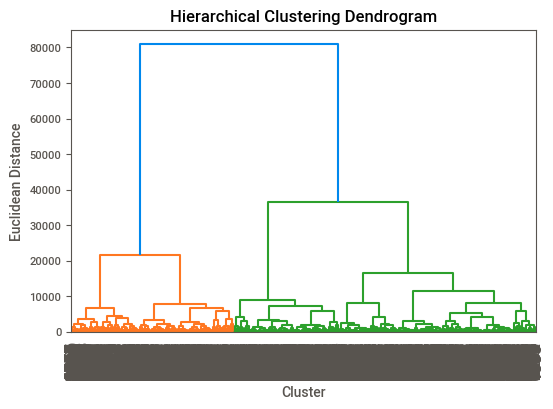

In [213]:

import matplotlib.pyplot as plt
dendrogram(X, truncate_mode = 'level')
plt.xticks(rotation = 90, fontsize = 12)
plt.ylabel('Euclidean Distance')
plt.xlabel('Cluster')
plt.title('Hierarchical Clustering Dendrogram')


In [214]:
# Looks like 5 clusteres best describe our data based on above dendrogram. So, we get us a model with 5 clusters and store the label in the data frame
from sklearn.cluster import AgglomerativeClustering
agc_model = AgglomerativeClustering(n_clusters = 5)
agc_model.fit(final_encoded_scaled_df)
final_encoded_scaled__clustered_df = copy.deepcopy(final_encoded_scaled_df)
final_encoded_scaled__clustered_df['agglomerative_cluster'] = agc_model.labels_

In [215]:
final_encoded_scaled__clustered_df.head()

,Servings,weighted_mean_ratings,calories,protein,carbohydrates,fat,sodium,carbohydrates_level,protien_level,fat_level,sodium_level,overall_food_quality,tot_labour_cost($),agglomerative_cluster
0,31,401,163,46,179,86,1946,1,2,0,0,2,48,2
1,23,8,62,25,109,15,1484,2,2,1,0,1,62,2
2,32,5,43,14,26,38,242,1,2,0,1,1,176,0
3,13,60,270,78,329,124,2837,2,2,0,0,2,58,3
4,29,434,116,41,173,42,1299,2,2,2,2,1,34,2


In [232]:
 # we could try to see several of the ffeatures, but there are too many combinations even if we want to see a 5D scatter plots
#  from itertools import combinations
#  comb = list(combinations(list(final_encoded_scaled__clustered_df.index), 3))
#  len(comb) # 

In [216]:
# will do just one plot here 
import plotly.express as px
fig1 = px.scatter_3d(final_encoded_scaled__clustered_df, 
x = 'sodium',
y='weighted_mean_ratings',
z='tot_labour_cost($)',
color='agglomerative_cluster', 
opacity = 0.8, 
size='fat',
 size_max=30,
 labels={col:col.replace('_', ' ') for col in final_encoded_scaled__clustered_df.columns}
 )


fig1.update_layout(width=800, height=500,
paper_bgcolor = 'aliceblue',
title =f'Agglomerative Clustering \n\n( except the cluster number (colorbar) higher values means good)',
margin = dict(l=0,r=0,b=0,t=30 ),
coloraxis_colorbar_x=.85
        )
fig1.show()


A lot to unpack from the Agglomerative Clustering result above. For a star we can say the following

- CLUSTER 0: Low sodium, low fat recipes appear relatively labour inexpensive ( more precisely less time consuming to make)
- CLUSTER 1: There are not many recipes here. Most of them are on the expensive side, and have lower fat, and very low sodium.
- CLUSTER 2: Sit right in the middle of the sodium per serving pack. It appears the less expensive recipes have slightly higer fat than the more expensive ones. The more expensive ones are also poorly rated.
- CLUSTER 3: Amazing. These are fat recipes. Also, too much salt. Total labour cost of making them has a wide range.  So does the wmr
- CLUSTER 4: These recipes have a resemblance to CLUSTER 3 recipes. Some notable differences are... these ones have the second highest sodium, there are really faty ones that are relativel cheap to make and highly rated, probably for that reason.
- Overall, we don't see recipes that take too long to make being rated higher. The opposite is very true. 

In [217]:
# Let us see what KMeans say
from sklearn.cluster import KMeans

elbow = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 500, n_init = 10, random_state = 0)
    kmeans.fit(final_encoded_scaled__clustered_df[['sodium','weighted_mean_ratings','tot_labour_cost($)']])
    elbow.append(kmeans.inertia_)


In [218]:

fig2 =  px.line(x=range(1,20), y=elbow, markers=True)

fig2.update_layout(width=500, height=400,
paper_bgcolor = 'aliceblue',
title =f'WCSS vs. Cluster number',
margin = dict(l=0,r=0,b=0,t=30 ),
coloraxis_colorbar_x=.85,
        )
fig2.layout.xaxis.title = 'Cluster'
fig2.layout.yaxis.title = 'WCSS'

fig2.show()

In [219]:
# above fig suggests five clusters would be the most likely. Good to see the two cluster algorithms agree
kmeans_model = KMeans(n_clusters = 5, init="k-means++", max_iter = 500, n_init = 10, random_state = 42)
kmeans_model.fit_predict(final_encoded_scaled_df)
final_encoded_scaled__clustered_df['kmean_cluster'] = kmeans_model.labels_

In [220]:
# plot kmeans clusters
fig3 = px.scatter_3d(final_encoded_scaled__clustered_df, 
x = 'sodium',
y='weighted_mean_ratings',
z='tot_labour_cost($)',
color='kmean_cluster', 
opacity = 0.8, 
size='fat',
 size_max=30,
 labels={col:col.replace('_', ' ') for col in final_encoded_scaled__clustered_df.columns}
 )

fig3.update_layout(width=800, height=500,
paper_bgcolor = 'aliceblue',
title =f'KMeans Clustering \n\n( except the cluster number (colorbar) higher values means good)',
margin = dict(l=0,r=0,b=0,t=30 ),
coloraxis_colorbar_x=.85
        )
fig3.show()


A lot to unpack from the KMeans Clustering result above, too.  


- CLUSTER 0: Sit right in the middle of the sodium per serving pack. It appears the less expensive recipes have slightly higer fat. Rating of inexpensive recipes increases with fat levels. Most of the more expensive recipes in this cluster are poorly rated.
- CLUSTER 1: Too much salt and fat here. Total labour cost of making them has a wide range.  So does the wmr.
- CLUSTER 2: Lowest sodium, generally low fat recipes appear relatively labour inexpensive ( more precisely less time consuming to make)
- CLUSTER 3: These recipes have a resemblance to CLUSTER 1 recipes. Some notable differences are... these ones have the second highest sodium, there are really faty ones that are relatively cheap to make and highly rated, probably for that reason. For some reason, the low  fat recipes are cheaper, but less favourably rated.
- CLUSTER 4: There are not many recipes here. Fat levels are almost uniformly low across recipes. Most of them are on the expensive side, and have lower fat, and low sodium.
- Again,  we don't see recipes that take too long to make being rated higher. The opposite is very true. 

In [249]:
# a bit hard to interpret the 3d plots. Reduce dimensions using pca
from sklearn.decomposition import PCA
pca_  = PCA(n_components=2).fit_transform(final_encoded_scaled_df)
kmeans_model_4_pca = KMeans(n_clusters = 5, init="k-means++", max_iter = 500, n_init = 10, random_state = 44)
kmeans_model_4_pca.fit_predict(pca_)
final_encoded_scaled__clustered_df['kmean_cluster_4_pca'] = kmeans_model_4_pca.labels_


In [253]:
x_min, x_max = pca_[:, 0].min() - 1, pca_[:, 0].max() + 1
y_min, y_max = pca_[:, 1].min() - 1, pca_[:, 1].max() + 1

In [ ]:
# h = .05
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


Error: Session cannot generate requests

In [251]:
kmeans_model_4_pca.fit(pca_)
Z = kmeans_model_4_pca.predict(np.c_[xx.ravel(), yy.ravel()])

NameError: name 'xx' is not defined